# Object Detection: Overview & Methodologies

### Pengenalan

Pada minggu pertama, Anda mempelajari berbagai jenis klasifikasi gambar, kemudian melanjutkan dengan pembahasan tentang **transfer learning** dan membangun model **object localization** menggunakan versi modifikasi dari **M Nest**. Namun, ini hanya melibatkan satu objek dengan satu kotak pembatas dan satu kelas per gambar. Pada minggu ini, kita akan melangkah lebih jauh untuk mengenali beberapa objek dari berbagai kelas dalam satu gambar.

### Tujuan Pembelajaran
Dalam video ini, kita akan memberikan gambaran umum mengenai teknik dan terminologi dasar untuk deteksi objek. Setelah itu, kita akan menyelami beberapa metode deteksi objek dalam kode.

---

### Contoh Deteksi Objek
Contoh gambar ini sering digunakan untuk mendemonstrasikan deteksi objek. Gambar tersebut mengandung beberapa kelas objek dengan beberapa instance dari masing-masing kelas. Misalnya, objek seperti **person** yang terlihat dan diidentifikasi dengan kotak pembatas berwarna hijau, dan label **person** yang muncul di atas setiap kotak tersebut.

Selain itu, ada persentase di samping setiap label, seperti **person: 99%**. Persentase ini menunjukkan tingkat keyakinan model bahwa objek yang terdeteksi adalah **person**.

### Teknik Deteksi Objek

#### Sliding Window
Sliding windows menggunakan **persegi panjang** yang melintasi gambar. Pada setiap posisi sliding window, model mencoba untuk mengklasifikasikan apa yang dilihat dalam batasan persegi panjang dan mengabaikan bagian lain dari gambar. 

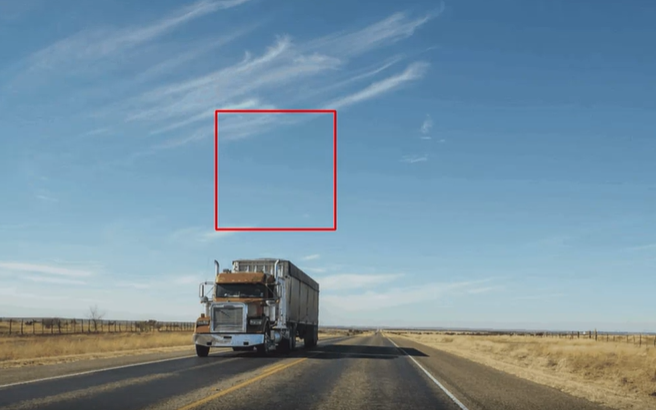

Contohnya, ketika jendela berada di atas truk, model dapat mengklasifikasikan objek dalam jendela sebagai truk. Dengan mengetahui posisi sliding window, kita bisa menebak lokasi objek di dalam gambar. Untuk mendapatkan kotak pembatas yang lebih tepat, beberapa jendela dengan ukuran berbeda digunakan.

#### Selective Search
Selective search adalah metode lain yang membuat sejumlah proposal untuk menemukan objek yang mungkin ada. Setelah objek terdeteksi, grup yang terkait akan digabungkan hingga kita mendapatkan satu grup yang membatasi objek tersebut dengan baik. Meskipun pendekatan ini cukup lambat, umumnya cukup efektif.

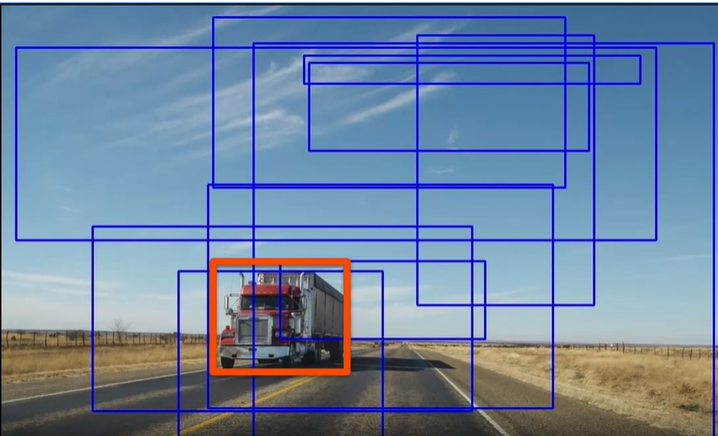

#### Non-Maximum Suppression (NMS)
Pada metode sliding window, beberapa jendela bisa mendeteksi objek yang sama. Non-Maximum Suppression (NMS) adalah teknik untuk memilih kotak pembatas terbaik berdasarkan **Intersection over Union (IoU)** tertinggi. Dengan NMS, kita dapat mengabaikan jendela yang tidak memiliki IoU terbesar dan hanya mempertahankan jendela dengan IoU maksimal.

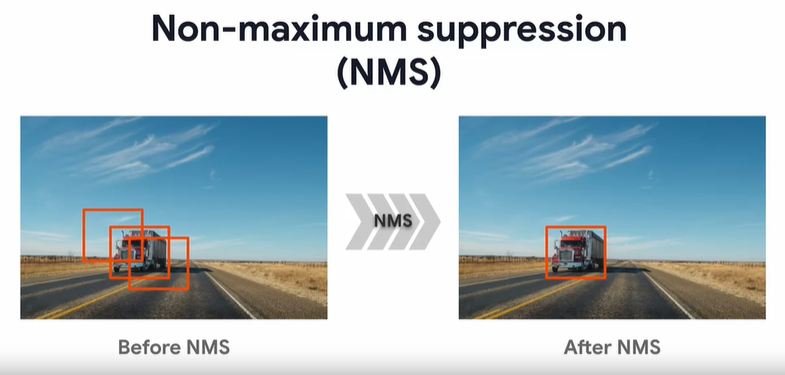

---

### Arsitektur Umum Deteksi Objek
Secara umum, deteksi objek dibagi menjadi dua tahap:
1. **Propose Region**: Menggunakan teknik seperti sliding window atau metode lain untuk mengajukan kemungkinan area yang berisi objek.
2. **Classify Object**: Mengidentifikasi dan mengklasifikasikan objek dalam area yang diusulkan.

Anda akan melihat pola ini pada banyak arsitektur umum yang digunakan oleh model deteksi objek.

# Arsitektur Model R-CNN

R-CNN (Region-based Convolutional Neural Network) adalah model pertama yang kita lihat, di mana *R* mengacu pada "region". R-CNN adalah metode yang menggunakan CNN berbasis region untuk mengimplementasikan *selective search* dengan jaringan neural. R-CNN pertama kali diusulkan dalam paper *Rich Feature Hierarchies for Accurate Object Detection and Semantic Segmentation* oleh Ross Girshick, Jeff Donahue, Trevor Darrell, dan Jitendra Malik pada tahun 2013.

### Langkah-Langkah dalam Proses R-CNN:

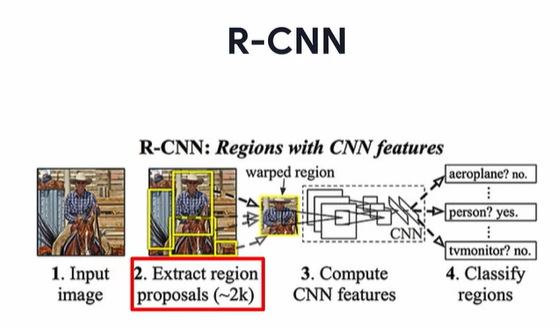

1. **Input Gambar**  
   R-CNN pertama-tama menerima gambar input.

2. **Ekstraksi Region Proposal**  
   Kemudian, model mengekstrak *region proposals*. Setiap *region proposal* merupakan pengelompokan segmen-segmen kecil menggunakan metode *selective search* yang telah dibahas sebelumnya.

   - **Penjelasan lebih lanjut**: Model ini akan menghasilkan sekitar 2000 region proposal.

3. **Ekstraksi Fitur Menggunakan CNN**  
   Selanjutnya, model mengekstrak fitur dari setiap region proposal tersebut dengan menggunakan jaringan neural konvolusional yang sudah dilatih sebelumnya (pre-trained CNN). Dalam kasus ini, arsitektur yang digunakan adalah *AlexNet*.

   - **Penyesuaian Ukuran Region**: Agar region proposal sesuai dengan ukuran input *AlexNet*, dimensi gambar perlu disesuaikan atau di-*warp*. Region yang sudah disesuaikan ini disebut dengan *warped regions*.

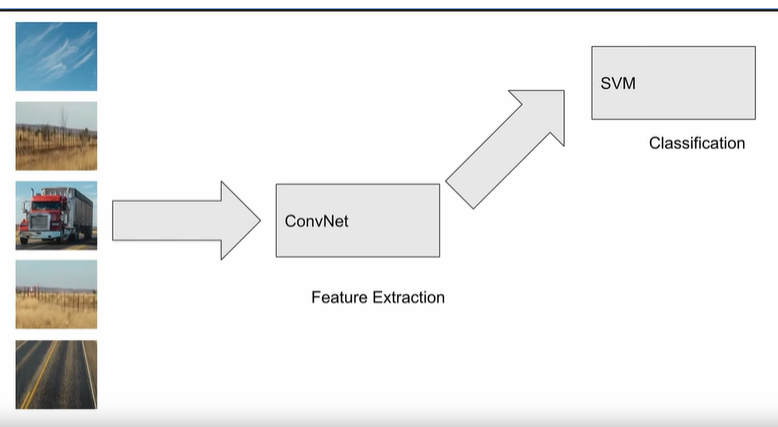

4. **Klasifikasi Region**  
   Untuk mengklasifikasikan region-region tersebut, R-CNN menggunakan *Support Vector Machines* (SVM) sebagai pengganti lapisan padat (dense layers).

   - **Proses Akhir**: Pada akhirnya, model akan mengklasifikasikan region tersebut dengan SVM untuk mendapatkan label, serta melakukan regresi untuk mendapatkan *bounding boxes* pada area yang menarik.

5. **Transfer Learning**  
   Untuk meningkatkan akurasi, *transfer learning* digunakan untuk melatih bagian CNN dari model R-CNN. Model ini terlebih dahulu dilatih dengan dataset tambahan yang lebih besar (*auxiliary dataset*) sebelum disesuaikan dengan tugas spesifik, yaitu deteksi objek.

   - **Pre-training pada Data yang Berbeda**: Dataset tambahan yang digunakan untuk *pre-training* ini mungkin berbeda dengan dataset yang digunakan untuk tugas spesifik. Meskipun demikian, data tambahan ini membantu model belajar fitur umum yang dapat digunakan untuk tugas spesifik tersebut.

6. **Fine-tuning**  
   Setelah proses *pre-training*, lapisan CNN disesuaikan atau *fine-tuned* pada tugas spesifik, yaitu deteksi objek, dengan menggunakan region proposal yang sudah di-*warp*.

### Contoh Penggunaan R-CNN:

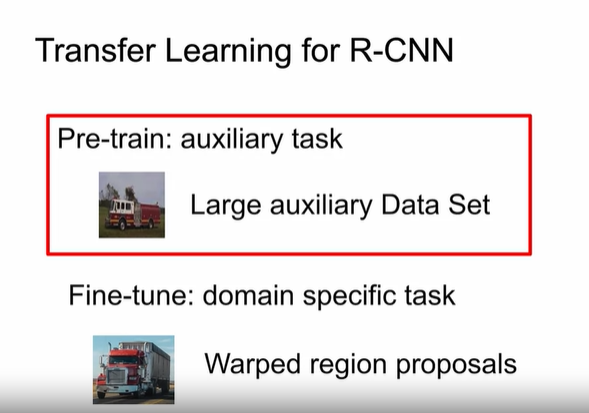

Sebagai contoh, jika kita menggunakan gambar truk, R-CNN akan dimulai dengan menggunakan *selective search* untuk mengidentifikasi region-region kecil yang menarik dalam gambar. Kemudian, region-region ini digabungkan berdasarkan berbagai faktor seperti kesamaan warna, tekstur, ukuran, dan bentuk, untuk menghasilkan *region proposals* yang lebih besar. Proposals ini akan diekstraksi, di-*warp* agar sesuai dengan ukuran yang diharapkan oleh *AlexNet*, dan kemudian dimasukkan ke dalam model untuk ekstraksi fitur dan klasifikasi menggunakan SVM.

---

### Kesimpulan:
Model R-CNN adalah salah satu metode pertama yang menggunakan CNN untuk deteksi objek berbasis region. Prosesnya melibatkan ekstraksi region menggunakan *selective search*, diikuti dengan ekstraksi fitur menggunakan jaringan neural konvolusional yang sudah dilatih sebelumnya, dan akhirnya mengklasifikasikan region tersebut menggunakan SVM. Metode ini juga memanfaatkan *transfer learning* untuk meningkatkan kinerja model.


# Fast R-CNN: Peningkatan dari R-CNN Asli

Salah satu kelemahan dari R-CNN asli adalah kecepatannya yang kurang. Menemukan area dengan menggunakan **Selective Search** bisa sangat lambat, dan menjalankan setiap area yang diminati, hingga 2.000 di antaranya, melalui CNN juga bisa sangat lambat dan membutuhkan banyak komputasi. Beberapa kekurangan dalam framework R-CNN asli adalah kecepatan dan **end-to-end trainability**. Masalah besar lainnya adalah kebutuhan memori karena harus memiliki beberapa **classifier** untuk setiap kelas objek. Oleh karena itu, **Ross Girshick** mengusulkan arsitektur yang diperbarui yang disebut **Fast R-CNN** untuk memperbaiki masalah tersebut.

## Keunggulan Fast R-CNN

Masalah kecepatan dan memori dapat diatasi di **Fast R-CNN** dengan menghapus **Selective Search Algorithm** yang mahal dan beberapa perubahan arsitektural yang menarik. Selain menggunakan **CNN**, cara kerja object proposal sedikit berbeda, dan kita akan melihat bagaimana hal tersebut bekerja.

## Arsitektur Fast R-CNN

Berikut adalah langkah-langkah yang terjadi dalam **Fast R-CNN**:

### 1. Input Gambar dan Region Proposals
- Pertama, gambar dimasukkan ke dalam jaringan bersama dengan satu set **region proposals**.
- Kotak kanan pada gambar ini adalah contoh visual dari **region proposal** untuk gambar ini.
- Perhatikan perbedaan antara **Fast R-CNN** dan **R-CNN** asli. Alih-alih menggunakan **Selective Search** untuk menghasilkan beberapa **region proposals** untuk setiap gambar, **Fast R-CNN** mengharapkan region proposals tersebut sebagai input dan tidak menghasilkannya sendiri.

### 2. Pemrosesan Gambar dan Pembuatan Feature Map
- **CNN** memproses gambar dan menghasilkan satu set fitur yang disebut **feature map**.
- Feature map ini disebut demikian karena fitur-fitur yang terdeteksi disimpan relatif terhadap lokasi deteksi mereka dalam gambar asli.
- Misalnya, jika yang terdeteksi adalah hati dan mulut kuda, fitur hati akan disimpan di bagian atas peta dan mulut kuda di bagian bawah, sesuai dengan posisi mereka dalam gambar asli.

### 3. Region of Interest Projection
- Langkah selanjutnya adalah menggunakan input **region proposals** dan mengekstrak area yang menarik dari feature map ini untuk membuat **region proposal feature map**.
- Proses ini disebut **region of interest projection**.
- Perbedaan antara **feature map** pertama dan **region proposal feature map** adalah bahwa **feature map** pertama untuk seluruh gambar, sedangkan **region proposal feature map** adalah untuk subseksi tertentu dari gambar yang diusulkan.

### 4. Region of Interest Pooling
- Kami kemudian **down-sample** feature map ini dengan bantuan lapisan **region of interest pooling** untuk mendapatkan feature map dengan panjang tetap dan ukuran yang konsisten.
- Ini berarti bahwa meskipun dimensi setiap region yang diusulkan bervariasi, **fixed length feature map** memiliki ukuran yang konsisten.

### 5. Pengolahan dan Output
- Untuk membuat peta ini dapat digunakan, kami kemudian meratakannya menjadi **one-dimensional vector**, yang disebut **region of interest feature vector**.
- **Fully connected layers** digunakan untuk membuat **region of interest feature vector** ini.
- Kemudian, kami dapat menggunakan **region of interest feature vector** untuk menghasilkan dua output:
  - **Output pertama** menggunakan **fully-connected layer**, diikuti dengan **Softmax** untuk mengklasifikasikan gambar.
  - **Output kedua** menggunakan **fully-connected layer** dan **regression outputs** untuk mendefinisikan ukuran dan lokasi dari **bounding box** untuk objek yang terklasifikasikan.

## Keunggulan Fast R-CNN dibandingkan R-CNN Asli

- **Tanpa Selective Search**: Fast R-CNN tidak menggunakan **Selective Search** untuk menemukan **regions of interest**. Sebagai gantinya, **ConvNet** digunakan dan filter-filter yang ada di dalamnya menentukan **regions of interest** tersebut.
- **Seluruh Gambar Diproses**: Gambar lengkap, bukan subsetnya, diproses melalui **ConvNet**, yang menghemat penggunaan **Selective Search** yang mahal.
- **Peta Fitur**: **ConvNet** yang dilatih untuk menemukan fitur kemudian memberikan **feature map** dari gambar tersebut.
- **Pooled Output**: Output dari **feature map** dapat dipooling dan diteruskan melalui **fully-connected dense layer** untuk mendapatkan **feature vector** yang mewakili **regions of interest** dalam gambar.
- **Klasifikasi dan Regresi**: **Feature vector** kemudian diklasifikasikan melalui **fully connected layer** dengan **Softmax** untuk mendapatkan klasifikasi, dan melalui lapisan lain dengan **regression** untuk mendapatkan **bounding boxes**.

## Referensi
Anda dapat membaca makalah **Fast R-CNN** yang ditulis oleh **Ross Girshick** di [URL ini](https://arxiv.org/abs/1504.08083), di mana ia juga membagikan beberapa **source code** untuk bagaimana ia mencapainya.


# **Faster R-CNN: Penjelasan dan Cara Kerjanya**

Faster R-CNN adalah pengembangan dari **Fast R-CNN** dengan penambahan **Region Proposal Network** (RPN) yang berfungsi untuk mengusulkan **regions of interest** pada **region proposal feature map**. RPN adalah sebuah jaringan konvolusional penuh (**fully convolutional network**) yang hanya menggunakan konvolusi, bukan lapisan padat (**dense layers**).

### **Bagaimana RPN Bekerja?**

RPN memungkinkan kita untuk memprediksi **object bounds** dan **object scores** pada setiap piksel secara simultan. RPN dirancang untuk dilatih **end-to-end** untuk menghasilkan **region proposals** berkualitas tinggi yang digunakan oleh **Faster R-CNN** untuk deteksi objek.

### **Proses Kerja Faster R-CNN:**

1. **Input Gambar**: Gambar keseluruhan dimasukkan ke dalam ConvNet.
2. **Sliding Window**: Window meluncur di atas **feature map** untuk mencari area yang menarik (regions of interest).
3. **Region Proposal Network (RPN)**: RPN digunakan untuk menemukan dan membuat **anchor boxes** pada gambar. 
    - **Anchor box** dibentuk berdasarkan koordinat sliding window dan batas box berasal dari RPN.
    - RPN memberikan skor untuk mengetahui seberapa baik batas box cocok dengan objek.

### **Proses Lanjutan:**

Setelah mendapatkan **region proposals**, area yang menarik tersebut dipotong dan diproses melalui **classification** dan **regression layer** untuk mendapatkan **labels** dan **bounding boxes**. Meskipun detail algoritma ini sedikit lebih teknis, yang penting dipahami adalah adanya berbagai algoritma yang digunakan dalam proses ini.

### **Catatan Penting:**

- RPN adalah metode cepat untuk menemukan area yang menarik dalam gambar.
- Seluruh proses ini akan digunakan dalam tahap selanjutnya untuk deteksi objek.

# **Langkah-langkah Menggunakan Object Detection API di TensorFlow**

---

## **Pendahuluan**
Sebelumnya, Anda telah mempelajari cara mengunduh model dari TensorFlow Hub, mempersiapkan gambar, dan mendapatkan kelas, probabilitas, serta bounding box dari objek dalam gambar. Berikut ini adalah langkah-langkah untuk memanfaatkan **Object Detection API** pada TensorFlow agar proses tersebut lebih mudah.

---

## **Mengunduh dan Menyiapkan API**

1. **Clone Repository TensorFlow Models**  
   Gunakan perintah berikut untuk mengunduh direktori **TensorFlow Models** dari GitHub:
   ```bash
   git clone https://github.com/tensorflow/models.git
   ```

Jika menggunakan Colab, tambahkan tanda seru (!) di depan perintah agar dapat dijalankan sebagai command line:

   ```bash
!git clone https://github.com/tensorflow/models.git
```

Menjelajahi Direktori

Setelah cloning, direktori baru bernama models akan muncul.
Di dalamnya terdapat folder research, yang di dalamnya lagi terdapat folder object_detection.
Menginstal Protobuf Compiler

Pastikan Protobuf Compiler sudah terinstal dengan menggunakan perintah berikut:

   ```bash
sudo apt install protobuf-compiler
```
Navigasikan ke folder models/research/object_detection/protos untuk mengompilasi file protobufs:

protoc *.proto --python_out=.
Instalasi API

Salin skrip setup ke dalam folder:

cp object_detection/packages/tf2/setup.py .
Jalankan instalasi menggunakan pip:

pip install .
Komponen API
1. Label Map Utilities
Fungsi: Menghubungkan indeks integer dengan nama kategori.
Format Data: Menggunakan file .pbtxt dengan pasangan nilai id dan display_name. Contoh:
plaintext
Copy code
id: 5
display_name: "airplane"
Penggunaan:
Tetapkan path file .pbtxt ke variabel, misalnya path_to_labels.
Gunakan fungsi create_category_index_from_label_map untuk menghasilkan category index berupa dictionary.
2. Visualization Utilities
Fungsi: Mempermudah menggambar bounding box pada gambar.
Metode Utama:
plaintext
Copy code
visualize_boxes_and_labels_on_image_array
Metode ini memetakan skor dari model ke gambar.
3. Ops Utilities
Fungsi: Menyediakan fungsi tambahan seperti masking gambar untuk segmentasi objek.
Manfaat API
Label Map: Membantu menerjemahkan prediksi model (angka) menjadi teks yang dapat dimengerti.
Visualisasi: Mengurangi kompleksitas dalam menggambar bounding box.
Ops: Menyediakan fungsi lanjutan untuk kebutuhan segmentasi.
Copy code







# Penjelasan Konsep dan Proses
Ketika model dijalankan, hasil prediksinya berupa **dictionary** dengan pasangan **key-value**, di mana nilai-nilainya adalah objek **tensor**. Berikut adalah penjelasan langkah-langkahnya:

## 1. **Dictionary Hasil Prediksi**
- Variabel `results` menyimpan hasil berupa **dictionary**.
- **Key**: `detection_scores`, `detection_classes`, dan `detection_boxes` (standar pada model object detection API).
- **Value**: Objek **tensor** berisi prediksi model.

## 2. **Konversi Tensor ke Numpy Array**
Gunakan **list comprehension** untuk mengonversi tensor ke array Numpy. Hal ini mempermudah decoding data dari tensor.

**Langkah:**
- Panggil `.numpy()` pada setiap tensor.
- Periksa daftar **key** dari dictionary dengan `results.keys()`.

---

## 3. **Visualisasi Bounding Boxes**
Gunakan API **visualization utils** untuk menggambar bounding box, label, dan skor pada gambar. Fungsi utama yang digunakan adalah:

`visualize_boxes_and_labels_on_image_array`

### **Parameter Penting:**
1. **Gambar**: Array numpy berisi gambar input.
2. **Bounding Boxes**: Data dari `detection_boxes`.
3. **Kelas Deteksi**: Data dari `detection_classes`.
4. **Skor Deteksi**: Data dari `detection_scores`.
5. **Category Index**: Mapping label ke teks.
6. **use_normalized_coordinates**: 
   - Set `True` untuk memberitahu bahwa bounding boxes memiliki koordinat ter-normalisasi.
   - Koordinat ini (0-1) akan diubah ke piksel untuk gambar.

---

## 4. **Penyesuaian ID Kelas**
- Model memberikan output berupa angka integer yang dimulai dari **0**.
- Label data mulai dari **1**.
- Tambahkan offset +1 untuk menyelaraskan dengan ID kelas dataset.

---

## 5. **Threshold Skor Minimum**
- **Fungsi**: Mengontrol tampilan label berdasarkan tingkat kepercayaan model.
- **Skor Minimum**: Jika skor di bawah nilai ini, bounding box tidak akan divisualisasikan.

---

## 6. **Koordinat Ter-normalisasi**
- Bounding box menggunakan koordinat dengan nilai antara **0** dan **1**.
- Untuk menyesuaikan dengan dimensi gambar:
  - Fungsi akan mengubahnya menjadi koordinat piksel (misalnya: 256 x 128).

---

## Contoh Visualisasi
Gambar di bawah menunjukkan hasil penerapan API deteksi objek. Dengan model dari **TensorFlow Hub**, hanya diperlukan beberapa baris kode untuk inference dan satu pemanggilan API untuk plotting.

![Contoh Visualisasi](https://via.placeholder.com/400x200.png "Contoh Visualisasi")

---

## Kesimpulan
Dengan memanfaatkan object detection API dari TensorFlow, proses deteksi objek dan visualisasi bounding box dapat disederhanakan secara signifikan.

### Selanjutnya:
Cobalah langkah-langkah ini pada **Google Colab** untuk pengalaman langsung. 🚀